In [1]:
library(Seurat)
library(CellChat)
library(pheatmap)


Attaching SeuratObject

载入需要的程辑包：dplyr


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


载入程辑包：‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  T Mono B NK other DC 


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

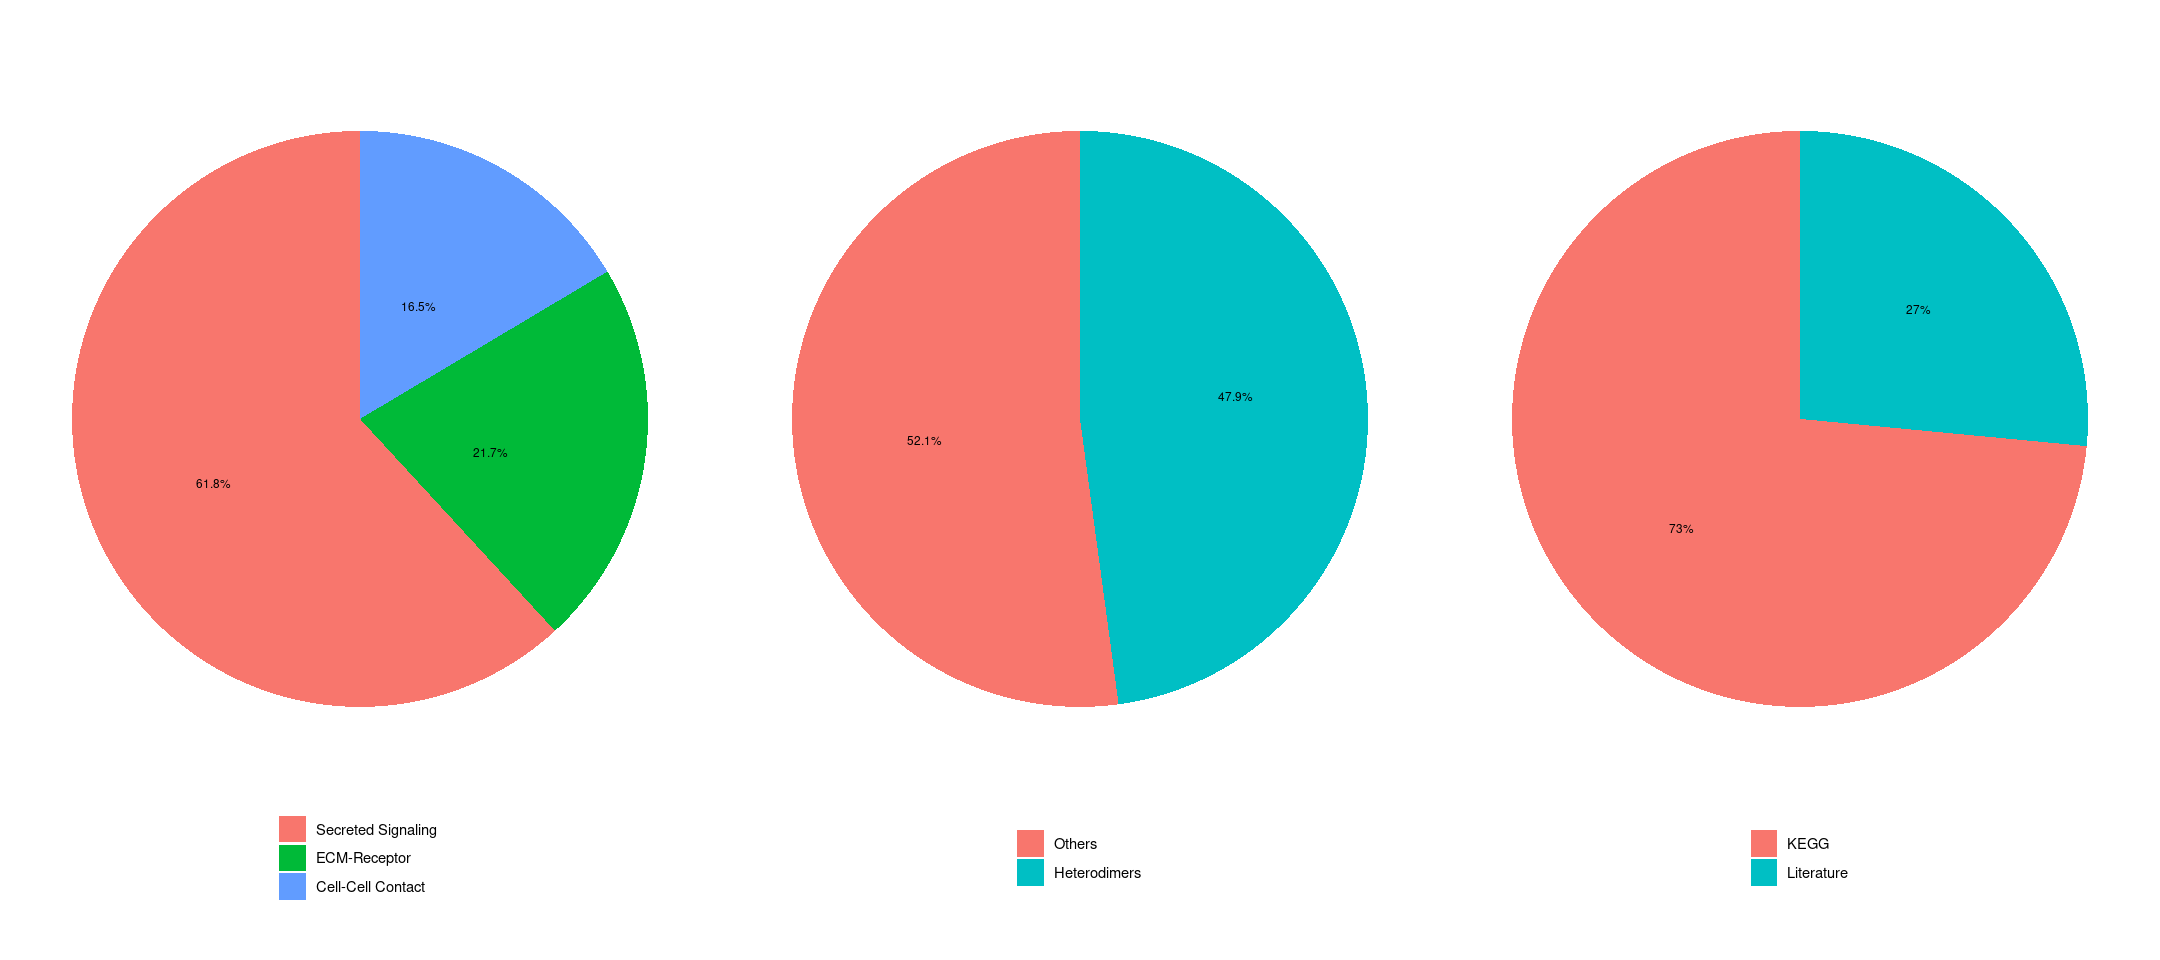

In [5]:
hd_group<-subset(sle,orig.ident=='hd')
#hd_group<-hd_group[,sample(1:dim(hd_group)[2],150000)]
#celltype<-as.vector(hd_group@meta.data$celltype.l1)
#names(celltype)<-rownames(hd_group@meta.data)
labels <- Idents(hd_group)
hd_data.input <- GetAssayData(hd_group, assay = "RNA", slot = "data") # normalized data matrix
#labels <- celltype
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
hd_cellchat <- createCellChat(object = hd_data.input, meta = meta, group.by = "group")
hd_cellchatDB <- CellChatDB.human  # use hd_cellchatDB.mouse if running on mouse data
showDatabaseCategory(hd_cellchatDB)
hd_cellchatDB.use <- hd_cellchatDB
hd_cellchat@DB <- hd_cellchatDB.use
hd_cellchat <- subsetData(hd_cellchat) 
future::plan("multicore", workers = 4)
hd_cellchat <- identifyOverExpressedGenes(hd_cellchat)
hd_cellchat <- identifyOverExpressedInteractions(hd_cellchat)
hd_cellchat <- projectData(hd_cellchat, PPI.human)
options(future.globals.maxSize= 1891289600) 
hd_cellchat <- computeCommunProb(hd_cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
hd_cellchat <- filterCommunication(hd_cellchat, min.cells = 10)
hd_cellchat <- computeCommunProbPathway(hd_cellchat)
hd_cellchat <- aggregateNet(hd_cellchat)
hd_cellchat <- netAnalysis_computeCentrality(hd_cellchat, slot.name = "netP")

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  T Mono B NK other DC 


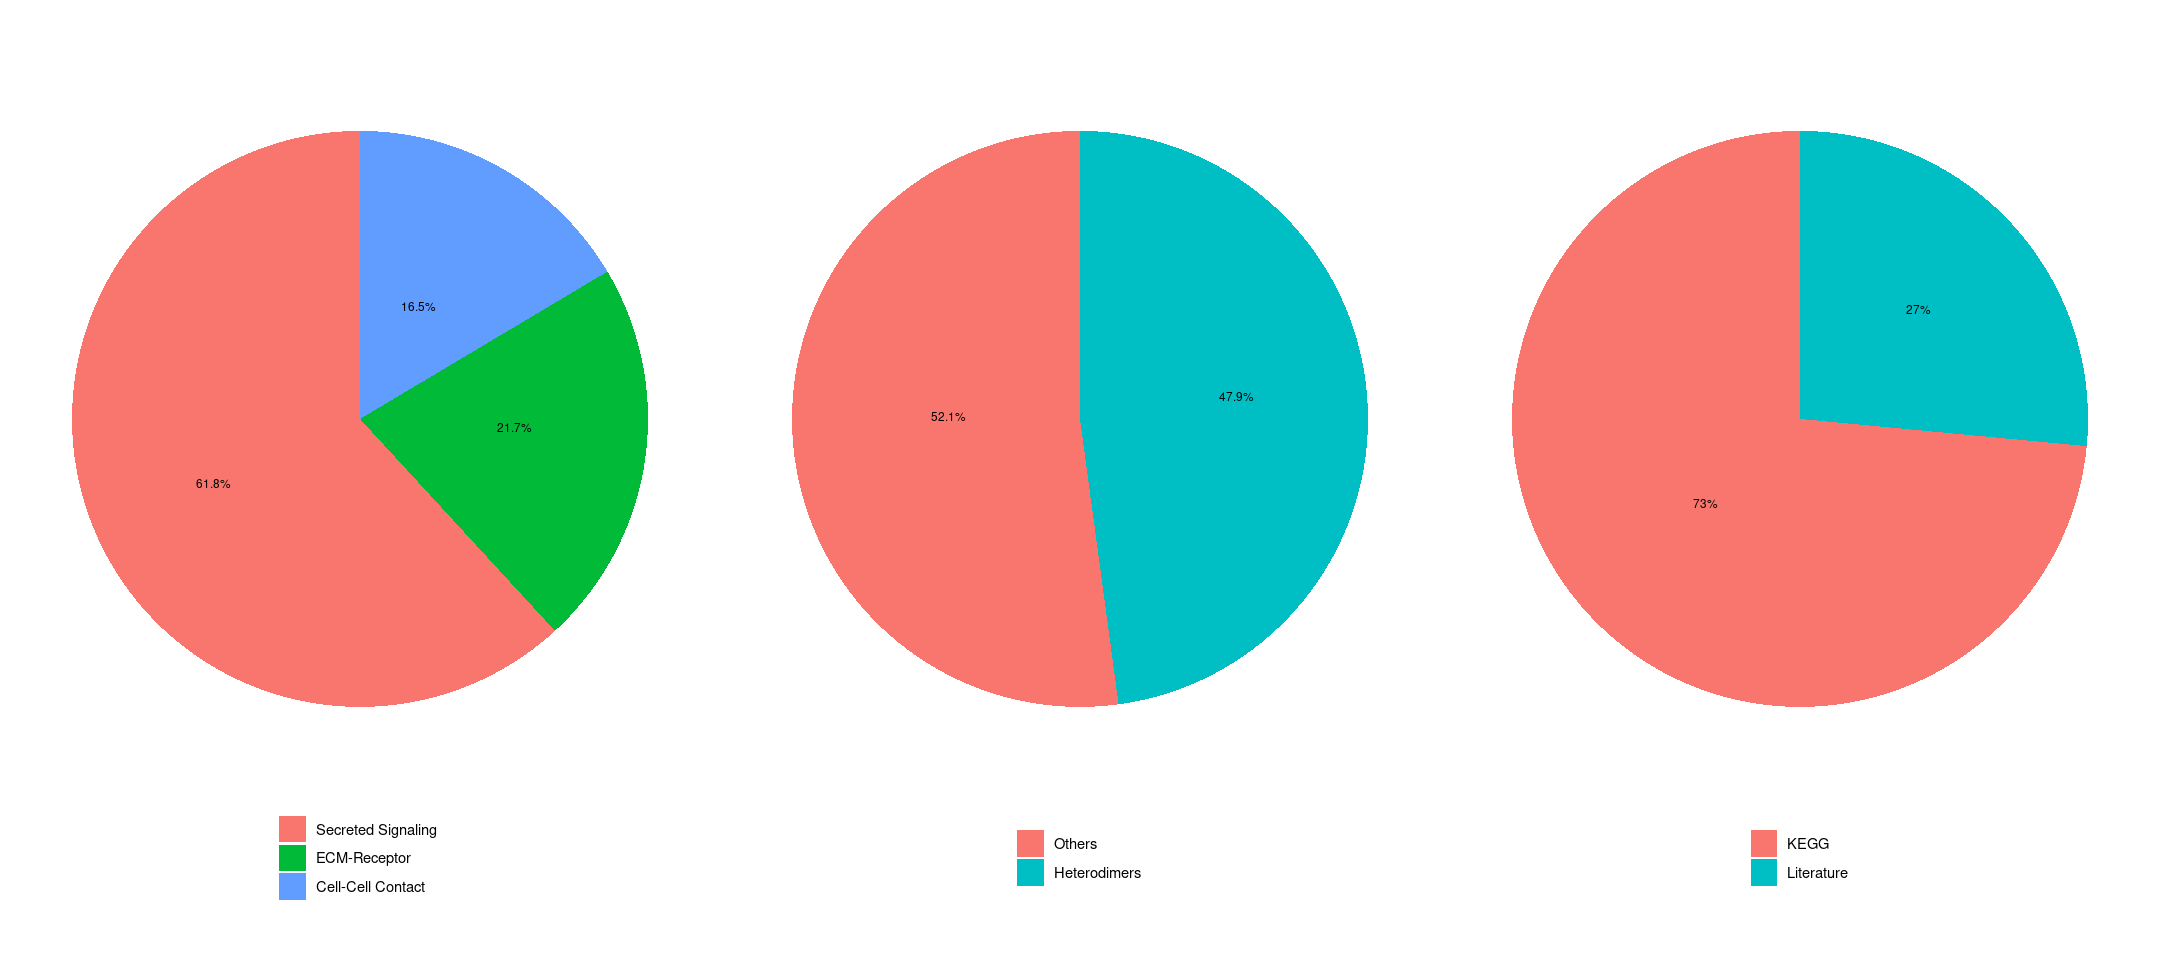

In [6]:
sle_group<-subset(sle,orig.ident=='sle')

#sle_group<-sle_group[,sample(1:dim(sle_group)[2],150000)]
data.input <- GetAssayData(sle_group, assay = "RNA", slot = "data") # normalized data matrix
labels <- Idents(sle_group)
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
CellChatDB.use <- CellChatDB
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
future::plan("multicore", workers = 1)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, PPI.human)
options(future.globals.maxSize= 1891289600) 
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
sle_cellchat<-cellchat

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  T Mono B NK other DC 


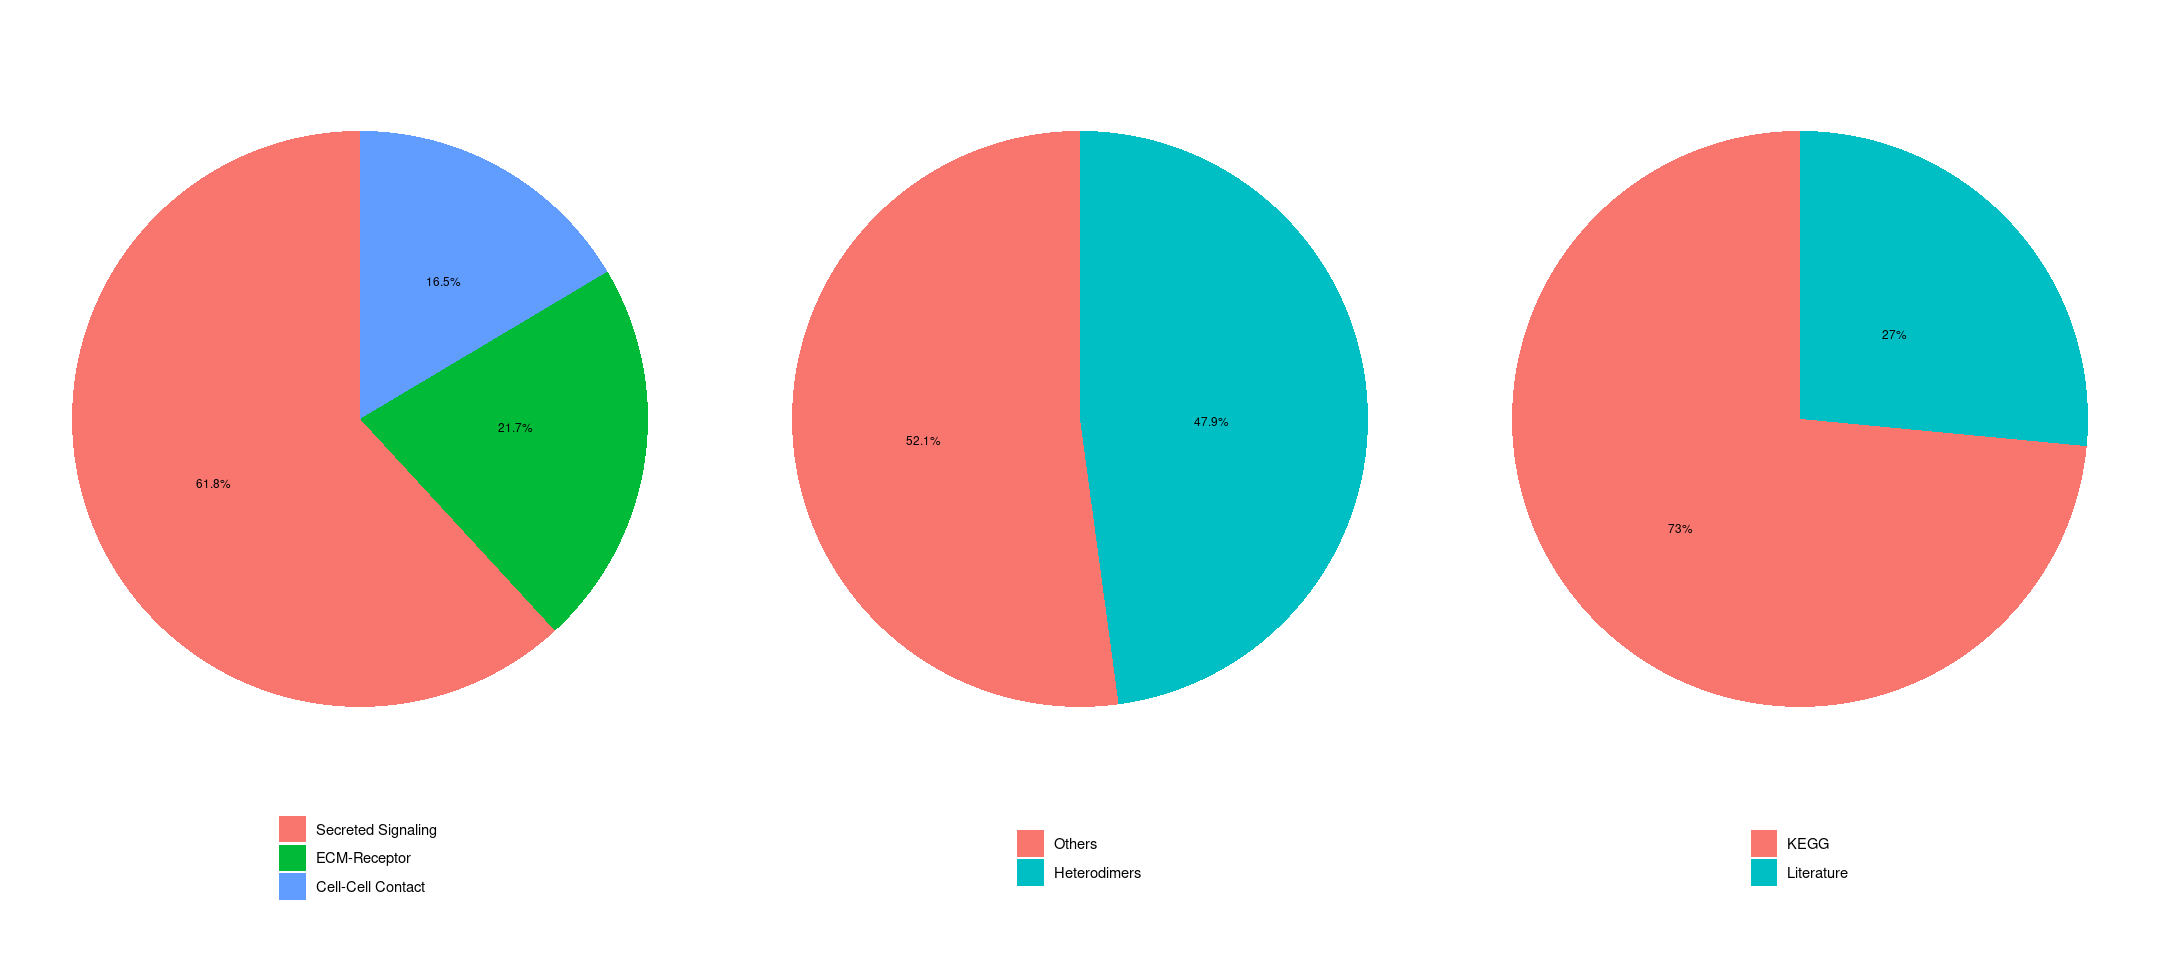

In [9]:
csle_heavy_group<-subset(sle,orig.ident=='csle_heavy')

#csle_heavy_group<-csle_heavy_group[,sample(1:dim(csle_heavy_group)[2],150000)]
data.input <- GetAssayData(csle_heavy_group, assay = "RNA", slot = "data") # normalized data matrix
labels <- Idents(csle_heavy_group)
meta <- data.frame(group = labels, row.names = names(labels)) # create a dataframe of the cell labels
cellchat <- createCellChat(object = data.input, meta = meta, group.by = "group")
CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
showDatabaseCategory(CellChatDB)
CellChatDB.use <- CellChatDB
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
future::plan("multicore", workers = 1)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, PPI.human)
options(future.globals.maxSize= 1891289600) 
cellchat <- computeCommunProb(cellchat)
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
csle_heavy_cellchat<-cellchat

In [2]:
object.list<-list(hd_cellchat,sle_cellchat,csle_heavy_cellchat)
saveRDS(object.list,'./merge_sle_immunonolgy_communication_cellchat.rds')